<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AGRA_ALIGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGRA Dataset traininig with ALIGNN model

In [1]:
!pip install -q dgl==1.0.1+cu117 -f https://data.dgl.ai/wheels/cu117/repo.html
!pip install -q alignn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
if not os.path.exists('AGRA'):
  !git clone https://github.com/Feugmo-Group/AGRA.git
os.chdir('AGRA')
# !pip install -e .

Cloning into 'AGRA'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 87 (delta 13), reused 16 (delta 7), pack-reused 56
Receiving objects: 100% (87/87), 4.03 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [3]:
!ls data

CO2RR.db  Dataset_generator.ipynb  ORR.db


In [4]:
# !unzip O_small_full.zip

In [5]:
!ls -altr O_small_full|wc -l

ls: cannot access 'O_small_full': No such file or directory
0


In [6]:
!ase db data/ORR.db

id|age|user     |formula          |calculator|  energy|natoms| fmax|pbc| volume|charge|    mass|magmom
 1|18M|tetsassic|Ir2PdPt6Rh2Ru5HO |gpaw      |-114.176|    18|0.034|TTF|576.730| 0.000|2389.526| 0.000
 2|18M|tetsassic|Ir2PdPt6Rh2Ru5O  |gpaw      |-110.614|    17|0.044|TTF|576.730| 0.000|2388.518| 0.000
 3|18M|tetsassic|Ir5Pd2Pt4Rh4RuHO |gpaw      |-110.122|    18|0.047|TTF|576.730| 0.000|2483.960| 0.000
 4|18M|tetsassic|Ir5Pd2Pt4Rh4RuO  |gpaw      |-106.481|    17|0.045|TTF|576.730| 0.000|2482.952| 0.000
 5|18M|tetsassic|Ir3Pd5Pt2Rh3Ru3HO|gpaw      |-102.409|    18|0.040|TTF|576.730| 0.000|2127.852| 0.000
 6|18M|tetsassic|Ir3Pd5Pt2Rh3Ru3O |gpaw      | -98.793|    17|0.043|TTF|576.730| 0.000|2126.844| 0.000
 7|18M|tetsassic|Ir7Pd2Pt3Rh4HO   |gpaw      |-112.026|    18|0.034|TTF|576.730| 0.000|2572.240| 0.000
 8|18M|tetsassic|Ir7Pd2Pt3Rh4O    |gpaw      |-108.373|    17|0.046|TTF|576.730| 0.000|2571.232| 0.000
 9|18M|tetsassic|Ir3Pd4Pt3Rh3Ru3HO|gpaw      |-103.409|    18|0.037|TTF|5

In [7]:
!ase db data/CO2RR.db

id|age|user|formula              |natoms|pbc|  volume|charge|    mass
 1|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 2|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 3|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 4|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 5|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 6|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 7|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 8|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 9|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
10|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
11|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
12|18M|zach|Co10Cu19Fe20Mo4Ni11CO|    66|TTT|2998.447| 0.000|3971.043
13|18M|zach|Co10Cu19Fe20Mo4Ni11CO|    66|TTT|2998.447| 0.000|3971.043
14|18M|zach|Co10Cu19

In [8]:
!ase db CO2RR/CO2RR_database.db

id|age|user|formula              |natoms|pbc|  volume|charge|    mass
 1|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 2|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 3|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 4|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 5|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 6|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 7|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 8|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
 9|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
10|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
11|18M|zach|Co7Cu14Fe19Mo8Ni16CO |    66|TTT|2998.447| 0.000|4097.936
12|18M|zach|Co10Cu19Fe20Mo4Ni11CO|    66|TTT|2998.447| 0.000|3971.043
13|18M|zach|Co10Cu19Fe20Mo4Ni11CO|    66|TTT|2998.447| 0.000|3971.043
14|18M|zach|Co10Cu19

In [9]:
from ase.db import connect
from jarvis.core.atoms import ase_to_atoms
db_O = connect("data/ORR.db")

mem_O=[]
mem_OH=[]
count=0
for row in db_O.select():
  count+=1
  id='agra_ORR_'+str(count)
  atoms = ase_to_atoms(row.toatoms())
  ead = row.ads_energy
  energy = row.energy
  adsb = row.adsorbate
  info={}
  info['id']=id
  info['atoms']=atoms.to_dict()
  info['ead']=ead
  info['energy']=energy
  if adsb=='OH':
    mem_OH.append(info)
  if adsb=='O':
    mem_O.append(info)

    # print(count,adsb)

  #break

In [10]:
len(mem_O),len(mem_OH),len(db_O)

(1000, 877, 1877)

In [11]:
from ase.db import connect
from jarvis.core.atoms import ase_to_atoms
db_CO2 = connect("data/CO2RR.db")

mem_CO=[]
mem_CHO=[]
mem_COOH=[]
count=0
for row in db_CO2.select():
  count+=1
  atoms = ase_to_atoms(row.toatoms())
  ead = row.Energy
  adsb = row.Adsorbate
  # print(adsb)
  id='agra_CO2RR_'+str(count)
  info={}
  info['id']=id
  info['atoms']=atoms.to_dict()
  info['ead']=ead
  info['energy']=energy
  if adsb=='CO':
    mem_CO.append(info)
  if adsb=='CHO':
    mem_CHO.append(info)
  if adsb=='COOH':
    mem_COOH.append(info)
  #break

In [12]:
len(mem_CO),len(mem_CHO),len(mem_COOH),len(db_CO2)

(194, 216, 280, 710)

In [13]:
from jarvis.db.jsonutils import dumpjson
dumpjson(data=mem_O,filename='AGRA_O.json')
dumpjson(data=mem_OH,filename='AGRA_OH.json')
dumpjson(data=mem_CO,filename='AGRA_CO.json')
dumpjson(data=mem_CHO,filename='AGRA_CHO.json')
dumpjson(data=mem_COOH,filename='AGRA_COOH.json')

In [14]:
!zip AGRA_O.json.zip AGRA_O.json
!zip AGRA_OH.json.zip AGRA_OH.json
!zip AGRA_CO.json.zip AGRA_CO.json
!zip AGRA_CHO.json.zip AGRA_CHO.json
!zip AGRA_COOH.json.zip AGRA_COOH.json

  adding: AGRA_O.json (deflated 78%)
  adding: AGRA_OH.json (deflated 77%)
  adding: AGRA_CO.json (deflated 78%)
  adding: AGRA_CHO.json (deflated 79%)
  adding: AGRA_COOH.json (deflated 79%)


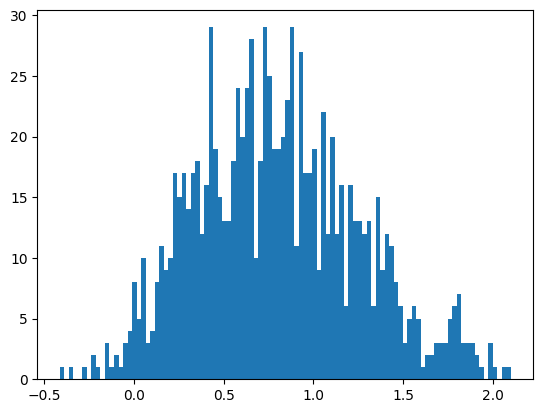

In [15]:

from jarvis.db.figshare import data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dfO=pd.DataFrame(mem_O)
plt.hist(dfO['ead'],bins=100)
plt.show()

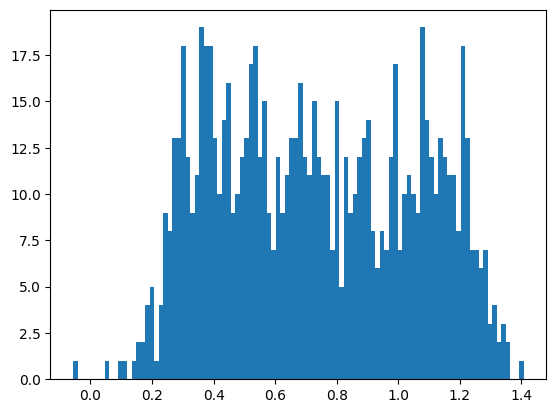

In [16]:

from jarvis.db.figshare import data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dfO=pd.DataFrame(mem_OH)
plt.hist(dfO['ead'],bins=100)
plt.show()

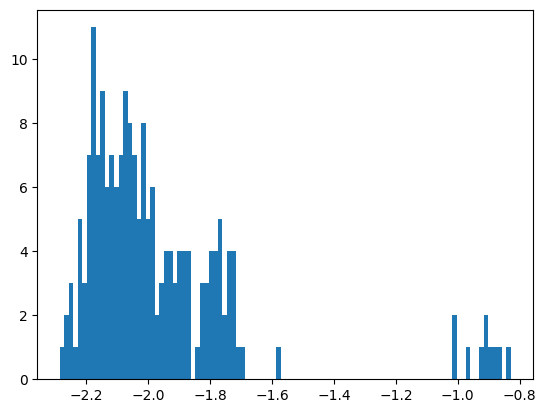

In [17]:

from jarvis.db.figshare import data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dfO=pd.DataFrame(mem_CO)
plt.hist(dfO['ead'],bins=100)
plt.show()

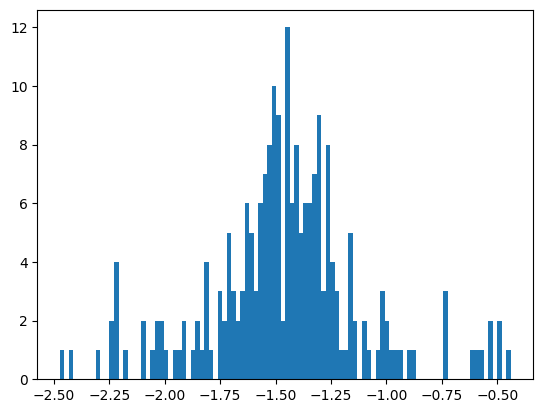

In [18]:

from jarvis.db.figshare import data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dfO=pd.DataFrame(mem_CHO)
plt.hist(dfO['ead'],bins=100)
plt.show()

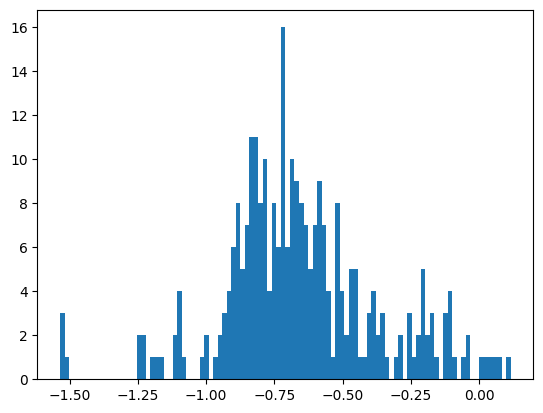

In [19]:

from jarvis.db.figshare import data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dfO=pd.DataFrame(mem_COOH)
plt.hist(dfO['ead'],bins=100)
plt.show()

In [20]:
from jarvis.core.atoms import Atoms
os.chdir('/content')

if not os.path.exists('DataDir_O'):
  os.makedirs('DataDir_O')
os.chdir('DataDir_O')
f=open('id_prop.csv','w')
for i in mem_O:
  line=i['id']+','+str(i['ead'])+'\n'
  f.write(line)
  atoms=Atoms.from_dict(i['atoms'])
  fname=i['id']
  atoms.write_poscar(fname)
f.close()
os.chdir('/content')


if not os.path.exists('DataDir_OH'):
  os.makedirs('DataDir_OH')
os.chdir('DataDir_OH')
f=open('id_prop.csv','w')
for i in mem_OH:
  line=i['id']+','+str(i['ead'])+'\n'
  f.write(line)
  atoms=Atoms.from_dict(i['atoms'])
  fname=i['id']
  atoms.write_poscar(fname)
f.close()
os.chdir('/content')


if not os.path.exists('DataDir_CO'):
  os.makedirs('DataDir_CO')
os.chdir('DataDir_CO')
f=open('id_prop.csv','w')
for i in mem_CO:
  line=i['id']+','+str(i['ead'])+'\n'
  f.write(line)
  atoms=Atoms.from_dict(i['atoms'])
  fname=i['id']
  atoms.write_poscar(fname)
f.close()
os.chdir('/content')



if not os.path.exists('DataDir_CHO'):
  os.makedirs('DataDir_CHO')
os.chdir('DataDir_CHO')
f=open('id_prop.csv','w')
for i in mem_CHO:
  line=i['id']+','+str(i['ead'])+'\n'
  f.write(line)
  atoms=Atoms.from_dict(i['atoms'])
  fname=i['id']
  atoms.write_poscar(fname)
f.close()
os.chdir('/content')



if not os.path.exists('DataDir_COOH'):
  os.makedirs('DataDir_COOH')
os.chdir('DataDir_COOH')
f=open('id_prop.csv','w')
for i in mem_COOH:
  line=i['id']+','+str(i['ead'])+'\n'
  f.write(line)
  atoms=Atoms.from_dict(i['atoms'])
  fname=i['id']
  atoms.write_poscar(fname)
f.close()
os.chdir('/content')


In [21]:
!wget https://raw.githubusercontent.com/usnistgov/alignn/main/alignn/examples/sample_data/config_example.json

--2023-08-20 01:34:23--  https://raw.githubusercontent.com/usnistgov/alignn/main/alignn/examples/sample_data/config_example.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1411 (1.4K) [text/plain]
Saving to: ‘config_example.json’

config_example.json 100%[===================>]   1.38K  --.-KB/s    in 0s      

2023-08-20 01:34:24 (20.7 MB/s) - ‘config_example.json’ saved [1411/1411]



In [22]:
from jarvis.db.jsonutils import loadjson,dumpjson
config = loadjson('config_example.json')
config['epochs'] = 200
config['batch_size'] = 10


dumpjson(data=config,filename='tmp_config.json')

In [23]:
!train_folder.py --root_dir "DataDir_O" --config "tmp_config.json" --output_dir="temp_O"

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
fatal: not a git repository (or any of the parent directories): .git
MAX val: 2.099618381007815
MIN val: -0.41205071554003325
MAD: 0.36789281040730787
Baseline MAE: 0.36015267427192815
data range 2.099618381007815 -0.41205071554003325
100% 800/800 [00:28<00:00, 28.17it/s]
df                                                  atoms  ...    target
0    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.463775
1    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.994273
2    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.550223
3    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.757501
4    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.582040
..                                     

In [24]:
!ls -altr

total 140
drwxr-xr-x 4 root root  4096 Aug 17 13:28 .config
drwxr-xr-x 1 root root  4096 Aug 17 13:29 sample_data
drwxr-xr-x 1 root root  4096 Aug 20 01:31 ..
drwxr-xr-x 6 root root  4096 Aug 20 01:34 AGRA
drwxr-xr-x 2 root root 36864 Aug 20 01:34 DataDir_O
drwxr-xr-x 2 root root 32768 Aug 20 01:34 DataDir_OH
drwxr-xr-x 2 root root 12288 Aug 20 01:34 DataDir_CO
drwxr-xr-x 2 root root 12288 Aug 20 01:34 DataDir_CHO
drwxr-xr-x 2 root root 12288 Aug 20 01:34 DataDir_COOH
-rw-r--r-- 1 root root  1411 Aug 20 01:34 config_example.json
-rw-r--r-- 1 root root  1157 Aug 20 01:34 tmp_config.json
drwxr-xr-x 1 root root  4096 Aug 20 01:34 .
drwxr-xr-x 2 root root  4096 Aug 20 02:05 temp_O


In [25]:
!ls temp_O

best_model.pt	    history_val.json		      test_data_data_range
checkpoint_199.pt   ids_train_val_test.json	      train_data_data_range
checkpoint_200.pt   mad				      val_data_data_range
config.json	    prediction_results_test_set.csv
history_train.json  prediction_results_train_set.csv


In [26]:
from alignn.models.alignn import ALIGNN, ALIGNNConfig
from jarvis.db.jsonutils import loadjson
from alignn.graphs import Graph
from jarvis.core.atoms import Atoms
import pandas as pd
from jarvis.db.figshare import data
import torch
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
device = "cpu"
dataset="AGRA_O"
id_tag='id'
out_dir="temp_O"
rootdir = "DataDir_O"
chkpt="temp_O/checkpoint_200.pt"
#chkpt="temp_O/best_model.pt"
csv_path=os.path.join(out_dir,"prediction_results_test_set.csv")
config_path=os.path.join(out_dir,"config.json")
res_df = pd.read_csv(csv_path)
if torch.cuda.is_available():
    device = torch.device("cuda")

dat=pd.DataFrame(data(dataset))
pd_merged = pd.merge(dat,res_df,on=id_tag)
config=loadjson(config_path)
model = ALIGNN(ALIGNNConfig(**config["model"]))
model.load_state_dict(torch.load(chkpt, map_location=device)["model"])
model.eval()
model.to(device)

# output_features=1
# model = ALIGNN(ALIGNNConfig(name="alignn", output_features=output_features))
# model.load_state_dict(torch.load(chkpt, map_location=device)["model"])
# model.eval()
# model=model.to(device)
x=[]
y=[]
z=[]
aa=[]
#for i,ii in (res_df.iterrows()):
for i,ii in (pd_merged.iterrows()):
  id=ii['id']
  atoms=Atoms.from_dict(ii['atoms'])
  pos_path=os.path.join(rootdir,id)
  atoms2=Atoms.from_poscar(pos_path)
  aa.append(aa)
  g,lg=Graph.atom_dgl_multigraph(atoms,use_canonize=True,cutoff=8.0,neighbor_strategy="k-nearest",max_neighbors=12)
  g=g.to(device)
  lg=lg.to(device)
  pred=model([g,lg]).detach().cpu().numpy().tolist()

  g1,lg1=Graph.atom_dgl_multigraph(atoms2,use_canonize=True,cutoff=8.0,neighbor_strategy="k-nearest",max_neighbors=12)
  g1=g1.to(device)
  lg1=lg1.to(device)
  pred2=model([g1,lg1]).detach().cpu().numpy().tolist()
  print(id,pred,pred2,ii['prediction'],ii['target'])
  x.append(ii['target'])
  y.append(ii['prediction'])
  z.append(pred)
mae_old = mean_absolute_error(x,y)
mae_new = mean_absolute_error(x,z)
info={}

info['len']=len(x)
info['mae_old']=mae_old
info['mae_new']=mae_new
print(info)

Obtaining AGRA Oxygen dataset 1000...
Reference:https://github.com/Feugmo-Group/AGRA


100%|██████████| 312k/312k [00:00<00:00, 435kiB/s]


Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


agra_ORR_1697 0.6642336845397949 0.6642336845397949 0.664234 0.737484
agra_ORR_1699 0.7457066774368286 0.7457066178321838 0.745707 0.740086
agra_ORR_1701 -0.006018240004777908 -0.006018240004777908 -0.006018 -0.004509
agra_ORR_1703 1.10946786403656 1.10946786403656 1.109468 1.185751
agra_ORR_1704 0.4156441390514374 0.41564419865608215 0.415644 0.363967
agra_ORR_1706 0.5905078649520874 0.5905077457427979 0.590508 0.58769
agra_ORR_1708 0.7908801436424255 0.7908803224563599 0.79088 0.791909
agra_ORR_1710 0.41776761412620544 0.41776761412620544 0.417768 0.415973
agra_ORR_1712 0.9043500423431396 0.9043500423431396 0.90435 0.889311
agra_ORR_1714 0.5868293046951294 0.5868291258811951 0.586829 0.54608
agra_ORR_1716 0.9305287599563599 0.9305285811424255 0.930529 0.945042
agra_ORR_1718 0.7714067697525024 0.7714067697525024 0.771407 0.741801
agra_ORR_1719 0.7178419232368469 0.7178419828414917 0.717842 0.650819
agra_ORR_1721 0.8999948501586914 0.8999947905540466 0.899995 0.905054
agra_ORR_1723 0.1

In [27]:
g.edata['r'][0]

tensor([1.3826, 2.3947, 0.0000], device='cuda:0')

In [28]:
g1.edata['r'][0]

tensor([0.0000, 3.1930, 2.2578], device='cuda:0')

In [29]:
atoms.composition.reduced_formula, atoms2.composition.reduced_formula, atoms.density, atoms2.density

('Ir3Ru4Pd3Rh5PtO', 'Ir3Ru4Pd3Rh5PtO', 5.832751652039113, 5.832751652039113)

In [30]:
atoms

System
1.0
5.530423557016226 0.0 0.0
0.0 4.789487294063948 0.0
0.0 0.0 21.773357888078852
Ir Ru Pd Rh Pt O 
3 4 3 5 1 1 
direct
0.0 0.0 0.3444576307928588 Ir
0.750000482379669 0.4999997175131327 0.3444576307928588 Ir
0.7469664433783565 0.519976482060626 0.6472395461035408 Ir
0.500000321586446 0.0 0.3444576307928588 Ru
0.500000321586446 0.6666662900175102 0.44815251126573713 Ru
0.5084557061588848 0.3365541549263033 0.548321429235832 Ru
0.7312626628341851 0.8299305122052871 0.5493624096632589 Ru
0.250000160793223 0.4999997175131327 0.3444576307928588 Pd
0.0 0.6666662900175102 0.44815251126573713 Pd
0.24751338968530406 0.831271189966367 0.5510866894578369 Pd
0.250000160793223 0.16666657250437755 0.44815251126573713 Rh
0.750000482379669 0.16666657250437755 0.44815251126573713 Rh
-0.01487864808447113 -0.004433722975593943 0.657534368058532 Rh
0.5133643377427142 -0.00385950429568881 0.6532876063582962 Rh
0.2539020193152106 0.49279917466827583 0.6543780561426878 Rh
-0.0014161355405218968 0.32

In [31]:
atoms2

System
1.0
5.530423557016226 0.0 0.0
0.0 4.789487294063948 0.0
0.0 0.0 21.773357888078852
Ir Ru Pd Rh Pt O 
3 4 3 5 1 1 
direct
0.0 0.0 0.3444576307928588 Ir
0.750000482379669 0.4999997175131327 0.3444576307928588 Ir
0.7469664433783565 0.519976482060626 0.6472395461035408 Ir
0.500000321586446 0.0 0.3444576307928588 Ru
0.500000321586446 0.6666662900175102 0.44815251126573713 Ru
0.5084557061588848 0.3365541549263033 0.548321429235832 Ru
0.7312626628341851 0.8299305122052871 0.5493624096632589 Ru
0.250000160793223 0.4999997175131327 0.3444576307928588 Pd
0.0 0.6666662900175102 0.44815251126573713 Pd
0.24751338968530406 0.831271189966367 0.5510866894578369 Pd
0.250000160793223 0.16666657250437755 0.44815251126573713 Rh
0.750000482379669 0.16666657250437755 0.44815251126573713 Rh
-0.01487864808447113 -0.004433722975593943 0.657534368058532 Rh
0.5133643377427142 -0.00385950429568881 0.6532876063582962 Rh
0.2539020193152106 0.49279917466827583 0.6543780561426878 Rh
-0.0014161355405218968 0.32

In [32]:
import pprint
pprint.pprint(config)
{'len': 100, 'mae_old': 0.11343228000000001, 'mae_new': 0.2405668252241325}#best
{'len': 100, 'mae_old': 0.11343228000000001, 'mae_new': 0.22036484209213253}#200

{'atom_features': 'cgcnn',
 'batch_size': 10,
 'classification_threshold': None,
 'criterion': 'mse',
 'cutoff': 8.0,
 'data_parallel': False,
 'dataset': 'user_data',
 'distributed': False,
 'epochs': 200,
 'filename': 'sample',
 'id_tag': 'jid',
 'keep_data_order': True,
 'learning_rate': 0.001,
 'log_tensorboard': False,
 'max_neighbors': 12,
 'model': {'alignn_layers': 4,
           'atom_input_features': 92,
           'classification': False,
           'edge_input_features': 80,
           'embedding_features': 64,
           'gcn_layers': 4,
           'hidden_features': 256,
           'link': 'identity',
           'name': 'alignn',
           'num_classes': 2,
           'output_features': 1,
           'triplet_input_features': 40,
           'zero_inflated': False},
 'n_early_stopping': None,
 'n_test': None,
 'n_train': None,
 'n_val': None,
 'neighbor_strategy': 'k-nearest',
 'normalize_graph_level_loss': False,
 'num_workers': 0,
 'optimizer': 'adamw',
 'output_dir': 't

{'len': 100, 'mae_old': 0.11343228000000001, 'mae_new': 0.22036484209213253}

In [33]:
os.chdir('/content')
from jarvis.db.jsonutils import loadjson
ids_train_val_test = loadjson('temp_O/ids_train_val_test.json')
#Make benchmark file
info={}
train_dat={}
val_dat={}
test_dat={}
for ii in mem_O:
  if ii['id'] in ids_train_val_test['id_train']:
    train_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_val']:
    val_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_test']:
    test_dat[ii['id']]=ii['ead']
info['train']=train_dat
info['val']=val_dat
info['test']=test_dat
from jarvis.db.jsonutils import dumpjson
dumpjson(data=info,filename="AGRA_O_ead.json")


In [34]:
!zip AGRA_O_ead.json.zip AGRA_O_ead.json

  adding: AGRA_O_ead.json (deflated 65%)


In [35]:
#Make contribution file
!cp temp_O/prediction_results_test_set.csv AI-SinglePropertyPrediction-ead-AGRA_O-test-mae.csv
!zip AI-SinglePropertyPrediction-ead-AGRA_O-test-mae.csv.zip AI-SinglePropertyPrediction-ead-AGRA_O-test-mae.csv

  adding: AI-SinglePropertyPrediction-ead-AGRA_O-test-mae.csv (deflated 66%)


In [36]:
!ls temp_O

best_model.pt	    history_val.json		      test_data_data_range
checkpoint_199.pt   ids_train_val_test.json	      train_data_data_range
checkpoint_200.pt   mad				      val_data_data_range
config.json	    prediction_results_test_set.csv
history_train.json  prediction_results_train_set.csv


In [37]:
!zip -r temp_O.zip temp_O

  adding: temp_O/ (stored 0%)
  adding: temp_O/history_train.json (deflated 55%)
  adding: temp_O/ids_train_val_test.json (deflated 85%)
  adding: temp_O/prediction_results_train_set.csv (deflated 51%)
  adding: temp_O/best_model.pt (deflated 8%)
  adding: temp_O/mad (deflated 12%)
  adding: temp_O/history_val.json (deflated 56%)
  adding: temp_O/train_data_data_range (stored 0%)
  adding: temp_O/config.json (deflated 59%)
  adding: temp_O/test_data_data_range (stored 0%)
  adding: temp_O/prediction_results_test_set.csv (deflated 66%)
  adding: temp_O/val_data_data_range (stored 0%)
  adding: temp_O/checkpoint_200.pt (deflated 8%)
  adding: temp_O/checkpoint_199.pt (deflated 8%)


In [38]:
!rm -rf temp_O

In [39]:
os.chdir('/content')

In [40]:
!pwd

/content


In [41]:
!train_folder.py --root_dir "DataDir_OH" --config "tmp_config.json" --output_dir="temp_OH"

fatal: not a git repository (or any of the parent directories): .git
MAX val: 1.4080818709252014
MIN val: -0.05679336959980219
MAD: 0.2767198030216958
Baseline MAE: 0.2738898930675022
data range 1.3599219447111892 -0.05679336959980219
100% 701/701 [00:17<00:00, 39.86it/s]
df                                                  atoms  ...    target
0    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.237832
1    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.689550
2    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.271353
3    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.441851
4    {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.286755
..                                                 ...  ...       ...
696  {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.868584
697  {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.989472
698  {'lattice_mat': [[5.530423557016226, 0.0, 0.0]...  ...  0.481818
699  {'lattice_mat': [[5

In [42]:
os.chdir('/content')
from jarvis.db.jsonutils import loadjson
ids_train_val_test = loadjson('temp_OH/ids_train_val_test.json')
#Make benchmark file
info={}
train_dat={}
val_dat={}
test_dat={}
for ii in mem_OH:
  if ii['id'] in ids_train_val_test['id_train']:
    train_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_val']:
    val_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_test']:
    test_dat[ii['id']]=ii['ead']
info['train']=train_dat
info['val']=val_dat
info['test']=test_dat
from jarvis.db.jsonutils import dumpjson
dumpjson(data=info,filename="AGRA_OH_ead.json")


In [43]:
!zip AGRA_OH_ead.json.zip AGRA_OH_ead.json

  adding: AGRA_OH_ead.json (deflated 65%)


In [44]:
#Make contribution file
!cp temp_OH/prediction_results_test_set.csv AI-SinglePropertyPrediction-ead-AGRA_OH-test-mae.csv
!zip AI-SinglePropertyPrediction-ead-AGRA_OH-test-mae.csv.zip AI-SinglePropertyPrediction-ead-AGRA_OH-test-mae.csv

  adding: AI-SinglePropertyPrediction-ead-AGRA_OH-test-mae.csv (deflated 67%)


In [45]:
os.chdir('/content')

In [46]:
!zip -r temp_OH.zip temp_OH

  adding: temp_OH/ (stored 0%)
  adding: temp_OH/history_train.json (deflated 55%)
  adding: temp_OH/ids_train_val_test.json (deflated 85%)
  adding: temp_OH/prediction_results_train_set.csv (deflated 52%)
  adding: temp_OH/best_model.pt (deflated 8%)
  adding: temp_OH/mad (deflated 11%)
  adding: temp_OH/history_val.json (deflated 56%)
  adding: temp_OH/train_data_data_range (stored 0%)
  adding: temp_OH/config.json (deflated 59%)
  adding: temp_OH/test_data_data_range (stored 0%)
  adding: temp_OH/prediction_results_test_set.csv (deflated 67%)
  adding: temp_OH/val_data_data_range (stored 0%)
  adding: temp_OH/checkpoint_200.pt (deflated 8%)
  adding: temp_OH/checkpoint_199.pt (deflated 8%)


In [47]:
!train_folder.py --root_dir "DataDir_CO" --config "tmp_config.json" --output_dir="temp_CO"

fatal: not a git repository (or any of the parent directories): .git
MAX val: -0.82876
MIN val: -2.2856
MAD: 0.18882752940004252
Baseline MAE: 0.12505212417657038
data range -0.82876 -2.2856
100% 155/155 [00:10<00:00, 14.24it/s]
df                                                  atoms  ...    target
0    {'lattice_mat': [[10.0819997787, 0.0, 0.0], [5...  ... -1.815340
1    {'lattice_mat': [[10.0819997787, 0.0, 0.0], [5...  ... -2.161600
2    {'lattice_mat': [[10.0819997787, 0.0, 0.0], [5...  ... -2.180620
3    {'lattice_mat': [[10.0819997787, 0.0, 0.0], [5...  ... -2.093670
4    {'lattice_mat': [[10.0819997787, 0.0, 0.0], [5...  ... -2.067250
..                                                 ...  ...       ...
150  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.808897
151  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -2.077303
152  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.776628
153  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -2.14574

In [48]:
os.chdir('/content')
from jarvis.db.jsonutils import loadjson
ids_train_val_test = loadjson('temp_CO/ids_train_val_test.json')
#Make benchmark file
info={}
train_dat={}
val_dat={}
test_dat={}
for ii in mem_CO:
  if ii['id'] in ids_train_val_test['id_train']:
    train_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_val']:
    val_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_test']:
    test_dat[ii['id']]=ii['ead']
info['train']=train_dat
info['val']=val_dat
info['test']=test_dat
from jarvis.db.jsonutils import dumpjson
dumpjson(data=info,filename="AGRA_CO_ead.json")


In [49]:
!zip AGRA_CO_ead.json.zip AGRA_CO_ead.json

  adding: AGRA_CO_ead.json (deflated 76%)


In [50]:
#Make contribution file
!cp temp_CO/prediction_results_test_set.csv AI-SinglePropertyPrediction-ead-AGRA_CO-test-mae.csv
!zip AI-SinglePropertyPrediction-ead-AGRA_CO-test-mae.csv.zip AI-SinglePropertyPrediction-ead-AGRA_CO-test-mae.csv

  adding: AI-SinglePropertyPrediction-ead-AGRA_CO-test-mae.csv (deflated 64%)


In [51]:
os.chdir('/content')
#!zip -r temp_CO.zip temp_CO

In [52]:
!zip -r temp_CO.zip temp_CO

  adding: temp_CO/ (stored 0%)
  adding: temp_CO/history_train.json (deflated 55%)
  adding: temp_CO/ids_train_val_test.json (deflated 86%)
  adding: temp_CO/prediction_results_train_set.csv (deflated 53%)
  adding: temp_CO/best_model.pt (deflated 8%)
  adding: temp_CO/mad (deflated 11%)
  adding: temp_CO/history_val.json (deflated 55%)
  adding: temp_CO/train_data_data_range (stored 0%)
  adding: temp_CO/config.json (deflated 59%)
  adding: temp_CO/test_data_data_range (stored 0%)
  adding: temp_CO/prediction_results_test_set.csv (deflated 64%)
  adding: temp_CO/val_data_data_range (stored 0%)
  adding: temp_CO/checkpoint_200.pt (deflated 8%)
  adding: temp_CO/checkpoint_199.pt (deflated 8%)


In [53]:
!train_folder.py --root_dir "DataDir_CHO" --config "tmp_config.json" --output_dir="temp_CHO"

fatal: not a git repository (or any of the parent directories): .git
MAX val: -0.439552285
MIN val: -2.472420325
MAD: 0.24996257928669408
Baseline MAE: 0.32956586632059826
data range -0.439552285 -2.472420325
100% 172/172 [00:12<00:00, 13.41it/s]
df                                                  atoms  ...    target
0    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.447092
1    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.546783
2    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.561247
3    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -2.017618
4    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.517757
..                                                 ...  ...       ...
167  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.480037
168  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.639793
169  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -1.623042
170  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [

In [54]:
os.chdir('/content')
from jarvis.db.jsonutils import loadjson
ids_train_val_test = loadjson('temp_CHO/ids_train_val_test.json')
#Make benchmark file
info={}
train_dat={}
val_dat={}
test_dat={}
for ii in mem_CHO:
  if ii['id'] in ids_train_val_test['id_train']:
    train_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_val']:
    val_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_test']:
    test_dat[ii['id']]=ii['ead']
info['train']=train_dat
info['val']=val_dat
info['test']=test_dat
from jarvis.db.jsonutils import dumpjson
dumpjson(data=info,filename="AGRA_CHO_ead.json")


In [55]:
!zip AGRA_CHO_ead.json.zip AGRA_CHO_ead.json

  adding: AGRA_CHO_ead.json (deflated 74%)


In [56]:
#Make contribution file
!cp temp_CHO/prediction_results_test_set.csv AI-SinglePropertyPrediction-ead-AGRA_CHO-test-mae.csv
!zip AI-SinglePropertyPrediction-ead-AGRA_CHO-test-mae.csv.zip AI-SinglePropertyPrediction-ead-AGRA_CHO-test-mae.csv

  adding: AI-SinglePropertyPrediction-ead-AGRA_CHO-test-mae.csv (deflated 64%)


In [57]:
os.chdir('/content')
#!zip -r temp_CO.zip temp_CO

In [58]:

!zip -r temp_CHO.zip temp_CHO

  adding: temp_CHO/ (stored 0%)
  adding: temp_CHO/history_train.json (deflated 55%)
  adding: temp_CHO/ids_train_val_test.json (deflated 87%)
  adding: temp_CHO/prediction_results_train_set.csv (deflated 53%)
  adding: temp_CHO/best_model.pt (deflated 8%)
  adding: temp_CHO/mad (deflated 10%)
  adding: temp_CHO/history_val.json (deflated 55%)
  adding: temp_CHO/train_data_data_range (stored 0%)
  adding: temp_CHO/config.json (deflated 59%)
  adding: temp_CHO/test_data_data_range (stored 0%)
  adding: temp_CHO/prediction_results_test_set.csv (deflated 64%)
  adding: temp_CHO/val_data_data_range (stored 0%)
  adding: temp_CHO/checkpoint_200.pt (deflated 8%)
  adding: temp_CHO/checkpoint_199.pt (deflated 8%)


In [59]:
!train_folder.py --root_dir "DataDir_COOH" --config "tmp_config.json" --output_dir="temp_COOH"

fatal: not a git repository (or any of the parent directories): .git
MAX val: 0.115324435
MIN val: -1.534700825
MAD: 0.21199695208163266
Baseline MAE: 0.1488003000063776
data range 0.115324435 -1.534700825
100% 224/224 [00:16<00:00, 13.23it/s]
df                                                  atoms  ...    target
0    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.892219
1    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.750434
2    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.957250
3    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.802952
4    {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.812909
..                                                 ...  ...       ...
219  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.596949
220  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.921388
221  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5...  ... -0.867938
222  {'lattice_mat': [[10.0823001862, 0.0, 0.0], [5..

In [60]:
os.chdir('/content')
from jarvis.db.jsonutils import loadjson
ids_train_val_test = loadjson('temp_COOH/ids_train_val_test.json')
#Make benchmark file
info={}
train_dat={}
val_dat={}
test_dat={}
for ii in mem_COOH:
  if ii['id'] in ids_train_val_test['id_train']:
    train_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_val']:
    val_dat[ii['id']]=ii['ead']
  if ii['id'] in ids_train_val_test['id_test']:
    test_dat[ii['id']]=ii['ead']
info['train']=train_dat
info['val']=val_dat
info['test']=test_dat
from jarvis.db.jsonutils import dumpjson
dumpjson(data=info,filename="AGRA_COOH_ead.json")


In [61]:
!zip AGRA_COOH_ead.json.zip AGRA_COOH_ead.json

  adding: AGRA_COOH_ead.json (deflated 74%)


In [62]:
#Make contribution file
!cp temp_COOH/prediction_results_test_set.csv AI-SinglePropertyPrediction-ead-AGRA_COOH-test-mae.csv
!zip AI-SinglePropertyPrediction-ead-AGRA_COOH-test-mae.csv.zip AI-SinglePropertyPrediction-ead-AGRA_COOH-test-mae.csv

  adding: AI-SinglePropertyPrediction-ead-AGRA_COOH-test-mae.csv (deflated 67%)


In [63]:
os.chdir('/content')
#!zip -r temp_CO.zip temp_CO

In [64]:

!zip -r temp_COOH.zip temp_COOH

  adding: temp_COOH/ (stored 0%)
  adding: temp_COOH/history_train.json (deflated 54%)
  adding: temp_COOH/ids_train_val_test.json (deflated 87%)
  adding: temp_COOH/prediction_results_train_set.csv (deflated 52%)
  adding: temp_COOH/best_model.pt (deflated 8%)
  adding: temp_COOH/mad (deflated 12%)
  adding: temp_COOH/history_val.json (deflated 55%)
  adding: temp_COOH/train_data_data_range (stored 0%)
  adding: temp_COOH/config.json (deflated 59%)
  adding: temp_COOH/test_data_data_range (stored 0%)
  adding: temp_COOH/prediction_results_test_set.csv (deflated 67%)
  adding: temp_COOH/val_data_data_range (stored 0%)
  adding: temp_COOH/checkpoint_200.pt (deflated 8%)
  adding: temp_COOH/checkpoint_199.pt (deflated 8%)


In [65]:
!rm *.csv